# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


Shape of y_train_one_hot: (50000, 10)
Shape of y_test_one_hot: (10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


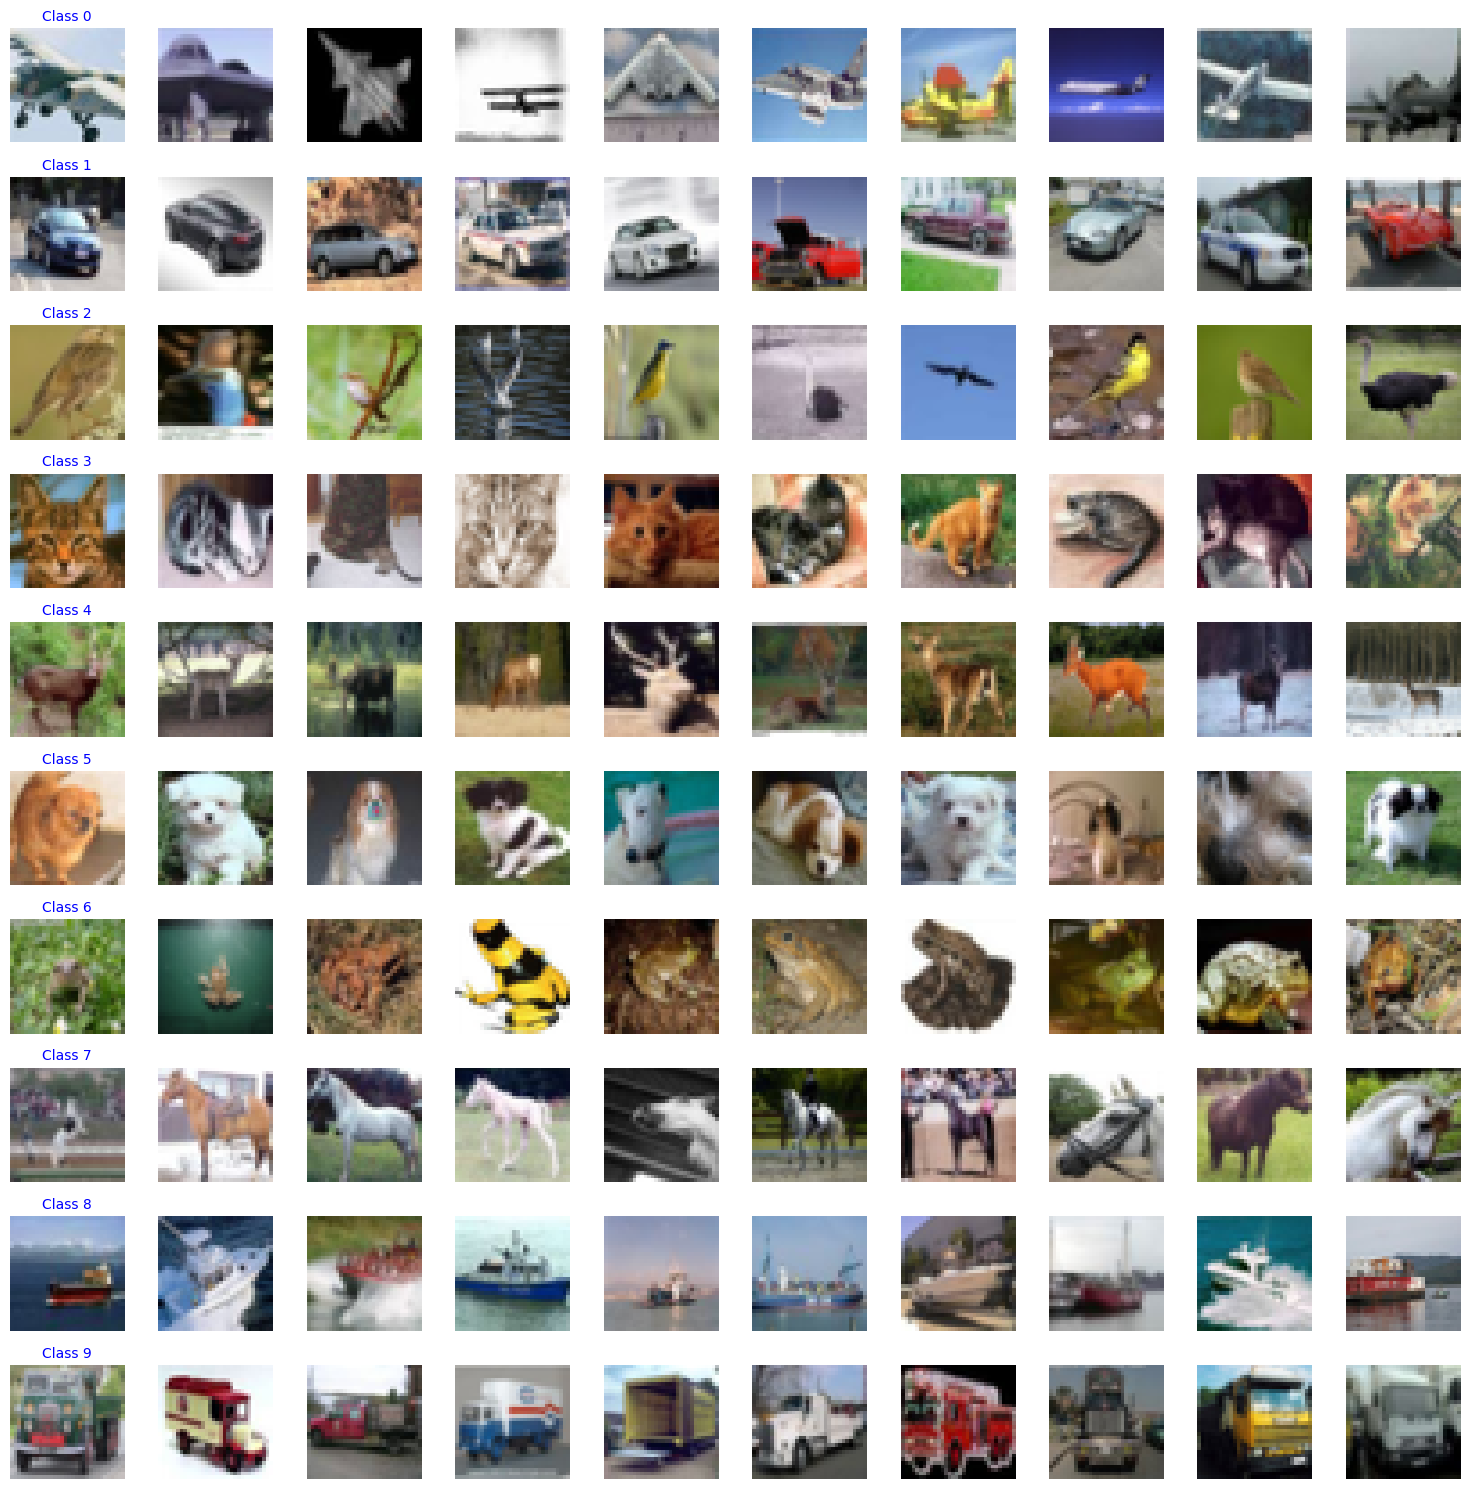

In [2]:
# Your code here :

#one hot encoded:

# Convert labels to one-hot encoded form
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Print shape to confirm the conversion
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

#Normalize

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)


#Plot:
def plot_cifar10_classes(x, y):
    classes = np.unique(y)  # Get the unique class labels (0-9)
    fig, axes = plt.subplots(10, 10, figsize=(15, 15))

    for class_idx, label in enumerate(classes):
        class_indices = np.where(y.flatten() == label)[0]  # Get indices of images with the current label
        random_indices = np.random.choice(class_indices, 10, replace=False)  # Choose 10 random images

        for i, ax in enumerate(axes[class_idx]):
            ax.imshow(x[random_indices[i]])
            ax.axis('off')  # Turn off axis labels
            if i == 0:
                ax.set_title(f'Class {label}', fontsize=10, color='blue')

    plt.tight_layout()
    plt.show()

# Call the function to display the images
plot_cifar10_classes(x_train, y_train)



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

#my input:
from tensorflow.keras import layers, models

In [4]:
# Your code here :

#Define model:
num_classes = 10
input_shape = (32, 32, 3)

# Make sure images have shape (32, 32, 1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


#Build the model:

# Build the model
model = models.Sequential(
    [
        layers.Input(shape=input_shape),  # Correct Input layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Additional convolution and pooling layers (optional)
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),  # Flatten the feature maps into a 1D vector
        layers.Dense(100, activation="relu"),  # Fully connected layer with 100 units
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(num_classes, activation="softmax"),  # Output layer with softmax activation
    ]
)

# Display the model summary
model.summary()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         627,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 638,454 (2.44 MB)

 Trainable params: 638,454 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
# Your code here :
## Train the model

batch_size = 512
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.2552 - loss: 2.0118 - val_accuracy: 0.4664 - val_loss: 1.5114
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4357 - loss: 1.5659 - val_accuracy: 0.5262 - val_loss: 1.3559
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4870 - loss: 1.4317 - val_accuracy: 0.5750 - val_loss: 1.2325
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5242 - loss: 1.3245 - val_accuracy: 0.5928 - val_loss: 1.1693
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5563 - loss: 1.2503 - val_accuracy: 0.6144 - val_loss: 1.1208
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5732 - loss: 1.2034 - val_accuracy: 0.6190 - val_loss: 1.0815
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5865 - loss: 1.1643 - val_accuracy: 0.6302 - val_loss: 1.0512
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6027 - loss: 1.1202 - val_accuracy: 0.6396 - 

*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8111 - loss: 0.4982 - val_accuracy: 0.6846 - val_loss: 1.0820
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8116 - loss: 0.4903 - val_accuracy: 0.6794 - val_loss: 1.0838
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8113 - loss: 0.4911 - val_accuracy: 0.6850 - val_loss: 1.1000
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8129 - loss: 0.4864 - val_accuracy: 0.6808 - val_loss: 1.1189
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8169 - loss: 0.4746 - val_accuracy: 0.6880 - val_loss: 1.1176
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8159 - loss: 0.4713 - val_accuracy: 0.6852 - val_loss: 1.1350
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8217 - loss: 0.4642 - val_accuracy: 0.6844 - val_loss: 1.1477
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8203 - loss: 0.4684 - val_accuracy: 0.6888 - v

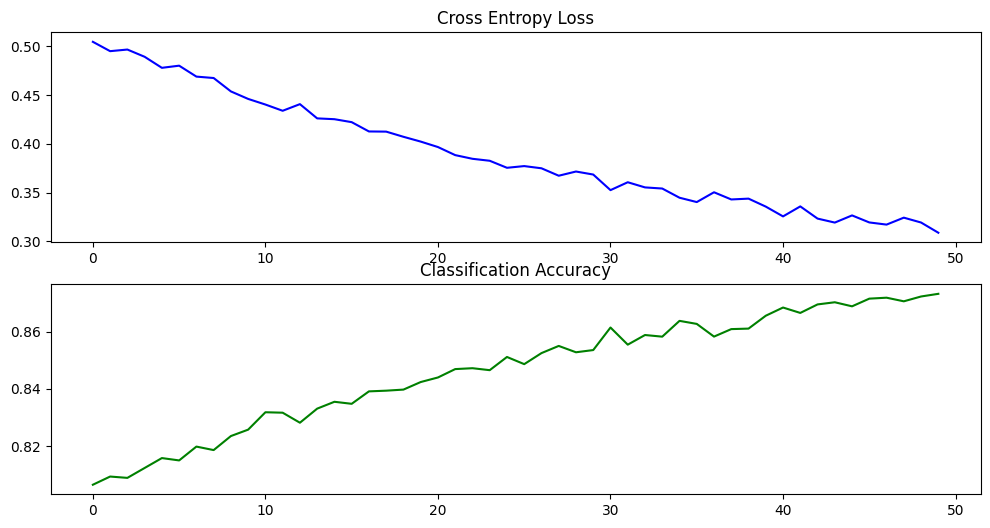

In [8]:
# Your code here :

# Save the training history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 6))

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [12]:
from keras.backend import clear_session
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [13]:


# Clear the previous model from memory
clear_session()

# Define model parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shape of the training data
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, num_classes)  # Shape: (50000, 10)
y_test = to_categorical(y_test, num_classes)    # Shape: (10000, 10)

# Build the VGG-like model
model = models.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Display the model summary
model.summary()



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :
# Compile and train the model
batch_size = 512
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.1020 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0999 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1003 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0983 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0971 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0990 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0987 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.0975 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1013 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1026 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1006 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0981 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1009 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━

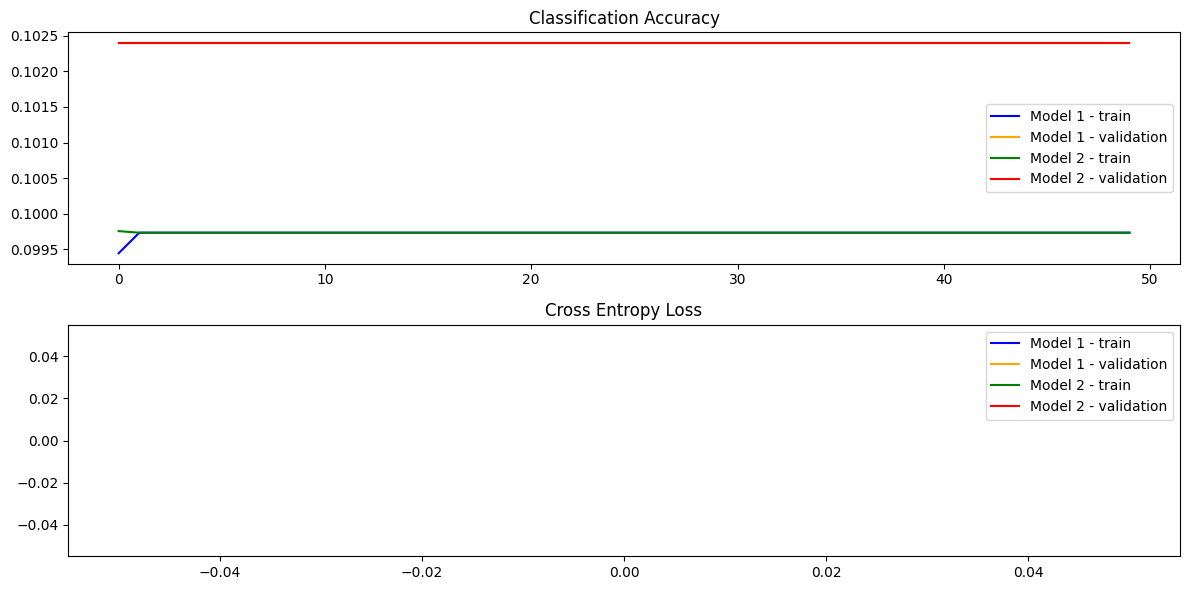

In [15]:
# Your code here :
import matplotlib.pyplot as plt
from keras.backend import clear_session
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Clear the previous model from memory
clear_session()

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the first model (e.g., the simple model)
model1 = models.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile and train the first model
model1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history1 = model1.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

# Clear the session to build the second model
clear_session()

# Build the second model (e.g., the VGG-like model)
model2 = models.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile and train the second model
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history2 = model2.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

# Plot the accuracy and loss curves for both models
plt.figure(figsize=(12, 6))

# Accuracy curve
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='Model 1 - train')
plt.plot(history1.history['val_accuracy'], color='orange', label='Model 1 - validation')
plt.plot(history2.history['accuracy'], color='green', label='Model 2 - train')
plt.plot(history2.history['val_accuracy'], color='red', label='Model 2 - validation')
plt.legend()

# Loss curve
plt.subplot(212)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='Model 1 - train')
plt.plot(history1.history['val_loss'], color='orange', label='Model 1 - validation')
plt.plot(history2.history['loss'], color='green', label='Model 2 - train')
plt.plot(history2.history['val_loss'], color='red', label='Model 2 - validation')
plt.legend()

plt.tight_layout()
plt.show()



**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


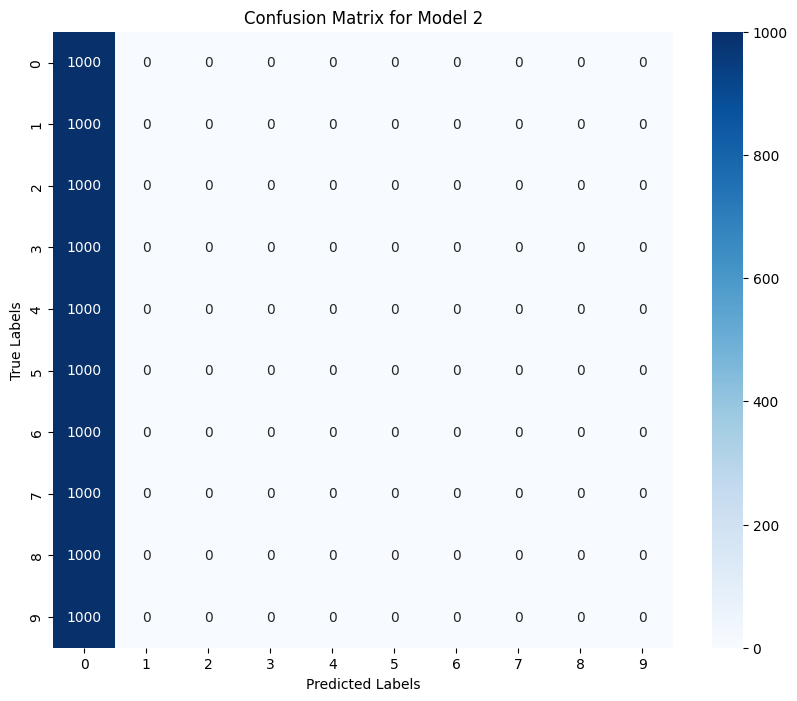

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical


# Your code here :
# Use the predict function on the test set
y_pred = model2.predict(x_test)  # Assuming you're using the second model
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Convert y_test back to class labels (from one-hot encoding)
y_test_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix for Model 2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

> Blockzitat einfügen



In [20]:
# Your code here :
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy of Model 1: {test_acc1 * 100:.2f}%")

# Evaluate the second model on the test data
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy of Model 2: {test_acc2 * 100:.2f}%")

Test accuracy of Model 1: 10.00%
Test accuracy of Model 2: 10.00%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [21]:
# Your code here :
from keras import layers, models

# Define the VGG model architecture
num_classes = 10
input_shape = (64, 64, 3)

# Build the model
model = models.Sequential([
    layers.Input(shape=input_shape),  # Input layer with 64x64x3 images

    # First Convolution Block (64 filters)
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolution Block (128 filters)
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Third Convolution Block (256 filters)
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output from the last convolution block
    layers.Flatten(),

    # Fully connected layer with 128 units
    layers.Dense(128, activation="relu"),

    # Output layer with 10 units (CIFAR-10 has 10 classes)
    layers.Dense(num_classes, activation="softmax")
])

# Display the model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [24]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

# Resize CIFAR-10 images to 64x64
x_train_resized = np.array([img_to_array(array_to_img(x).resize((64, 64))) for x in x_train])
x_test_resized = np.array([img_to_array(array_to_img(x).resize((64, 64))) for x in x_test])

# Normalize pixel values to between 0 and 1
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0

# Now you can use x_train_resized and x_test_resized for training and evaluation
print(x_train_resized.shape)  # Should be (50000, 64, 64, 3)
print(x_test_resized.shape)  # Should be (10000, 64, 64, 3)

# Compile the model
batch_size = 512
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# Train the model
history = model.fit(x_train_resized, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


(50000, 64, 64, 3)
(10000, 64, 64, 3)
Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - accuracy: 0.1002 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 313ms/step - accuracy: 0.1018 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.0991 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.1006 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.1008 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.0998 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
